# What is the True Normal Human Body Temperature? 

#### Analysis done by Brock Nosbisch
#### Background

Project: Analyze Human Body Temperature Using EDA

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [196]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

## Initialize

In [197]:
# Your work here.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson, norm
import scipy.stats as stats

# Function: ecdf
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Bootstrap Replicates
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Draw many bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

## 1. Is the distribution of body temperatures normal? YES

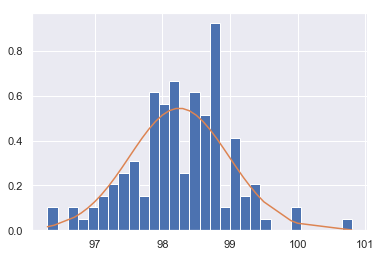

In [198]:
# Checking for Normality
data_sorted = df['temperature'].sort_values()
data_mean = data_sorted.mean()
data_std = data_sorted.std()
# The below histogram has a bell-shape look to it.
sns.set()
_ = plt.hist(df['temperature'], bins=30, density=True)
_ = plt.plot(data_sorted,norm.pdf(data_sorted,data_mean, data_std))
plt.show()

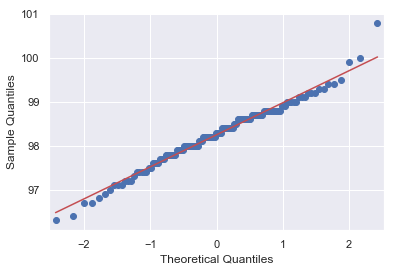

In [199]:
# QQ plot
# The data visually appears to follow the 45 degree line.
qqplot(df['temperature'], line='s')
plt.show()

In [200]:
# Shapiro-Wilk Test
# normality test
stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = .05 # if > .05 then fail to reject Null Hypothesis
if p>alpha:
    print('Sample looks to be Normal (fail to reject null hypothesis)')
else:
    print('Sample does not look to be Normal (reject null hypothesis)')

Statistics=0.987, p=0.233
Sample looks to be Normal (fail to reject null hypothesis)


In [201]:
# D'Agostino K^2 Test
# normality test
stat, p = normaltest(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = .05 # if > .05 then fail to reject Null Hypothesis
if p>alpha:
    print('Sample looks to be Normal (fail to reject null hypothesis)')
else:
    print('Sample does not look to be Normal (reject null hypothesis)')

Statistics=2.704, p=0.259
Sample looks to be Normal (fail to reject null hypothesis)


In [202]:
# Anderson-Darling Test

# normality test
result = anderson(df['temperature'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.520
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.637, data looks normal (fail to reject H0)
5.000: 0.765, data looks normal (fail to reject H0)
2.500: 0.892, data looks normal (fail to reject H0)
1.000: 1.061, data looks normal (fail to reject H0)


# 2a. Is the sample size large? YES.  > 30 samples is accepted as being sufficiently large.

# 2b. Are the observations independent? YES.  The temperature of 1 person is independent of another person.

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


# 3. Is the true population mean really 98.6 degrees F?  No, it is 98.25.
### First, try a bootstrap hypothesis test.
### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? One-Sample; We are comparing a single sample mean.
### In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic? t-statistic - Z-statistic requires knowing the population std. dev.
### Now try using the other test. How is the result be different? Why?  The result for Z* should be the same as t* since the sample size is large.

In [204]:
print('Mean: ' + str(np.mean(df['temperature'])))

Mean: 98.24923076923078


p-value: 0.0
mean: 98.24956846153847

Since p = 0.0, this indicates that we should reject the null hypothesis.


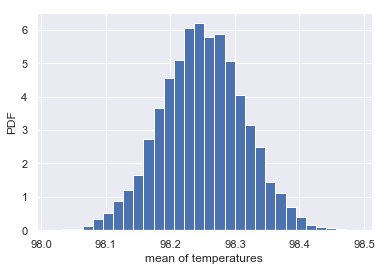

In [205]:
# Bootstrap Hypothesis Test

bs_replicates = np.empty(10000)
    
bs_replicates = draw_bs_reps(df['temperature'], np.mean, size=10000)

p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print('p-value: ' + str(p))
print('mean: ' + str(np.mean(bs_replicates)))
print()
print('Since p = 0.0, this indicates that we should reject the null hypothesis.')

_ = plt.hist(bs_replicates, bins=30, density=True)
_ = plt.xlabel('mean of temperatures')
_ = plt.ylabel('PDF')
plt.show()

In [206]:
t = stats.ttest_1samp(df['temperature'], 98.6)
t_score = t.statistic
t_p_value = t.pvalue
print('t-score: ' + str(t_score))
print('p-value: ' + str(t_p_value))

t-score: -5.4548232923645195
p-value: 2.4106320415561276e-07


# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
## Which one is the correct one to use? t-statistic; We still do not know what the true std. dev. of the population is so we can't use Z*.
## What do you notice? What does this tell you about the difference in application of the  𝑡 and  𝑧  statistic? z* requires you to know the population std dev and t* does not.  

In [207]:
sample = np.random.choice(df['temperature'], size=10)
t2 = stats.ttest_1samp(sample, 98.6)
t2_pvalue = t2.pvalue
t2_t_score = t2.statistic
print('t-score: ' + str(t2_t_score))
print('p-value: ' + str(t2_pvalue))
print('Since p-value is > .05 then we fail to reject the Null Hypothesis.')

t-score: -1.659159120989889
p-value: 0.13145703395296385
Since p-value is > .05 then we fail to reject the Null Hypothesis.


# 5. At what temperature should we consider someone's temperature to be "abnormal"?  Having a Margin of error below 96.86294 or higher than 99.72589 is considered abnormal.
## As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
## Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [208]:
bs_replicates = np.empty(10000)

bs_replicates = draw_bs_reps(np.random.choice(data_sorted, size=len(data_sorted)), np.mean, size=10000)

# calculate p-value
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)

# mean of the random samples
x_bar = np.mean(bs_replicates)

# confidence intervals
conf_ind_low, conf_ind_high = stats.norm.interval(.95, loc=x_bar, scale=np.std(data_sorted))

# margin of error
moe = conf_ind_high - x_bar
print('p-value: ' + str(p))
print('mean: ' + str(x_bar))
print('95% Confidence Interval: ' + str(conf_ind_low) + ' - ' + str(conf_ind_high))
print('Margin of Error: +-' + str(moe))
print()
print('Having a Margin of error below 96.86294 or higher than 99.72589 is considered abnormal.')


p-value: 0.0
mean: 98.28048646153846
95% Confidence Interval: 96.84901151905592 - 99.711961404021
Margin of Error: +-1.431474942482538

Having a Margin of error below 96.86294 or higher than 99.72589 is considered abnormal.


# 6. Is there a significant difference between males and females in normal temperature?
## What testing approach did you use and why? Two-Sample t-test; We are comparing 2 independent samples.
## Write a story with your conclusion in the context of the original problem.
### The two-sample t-test had results of t-statistic = -2.285 and p-value of 0.024.  The lower the p-value, the lower the chance the results were random.  Because our p-value was 0.024, we can say that it is unlikely that the average temperatures for Males and Females is the same.  Another way to put it, we reject the Null Hypothesis that stated the average temperatures between Male and Female are the same.

In [209]:
m = df[df['gender'] == 'M']
m_mean = np.mean(m['temperature'])
m_std = np.std(m['temperature'])

f = df[df['gender'] == 'F']
f_mean = np.mean(f['temperature'])
f_std = np.std(f['temperature'])

print('Male Count: ' + str(len(m)))
print('Male Mean: ' + str(m_mean))
print('Male Std. Dev.: ' + str(m_std))
print()
print('Female Count: ' + str(len(f)))
print('Female Mean: ' + str(f_mean))
print('Female Std. Dev.: ' + str(f_std))

Male Count: 65
Male Mean: 98.1046153846154
Male Std. Dev.: 0.6933598841828696

Female Count: 65
Female Mean: 98.39384615384613
Female Std. Dev.: 0.7377464486428966


In [210]:
print('It appears men have a lesser average temperature than females.')
print('Difference is: ' + str(f_mean-m_mean))

It appears men have a lesser average temperature than females.
Difference is: 0.289230769230727


In [211]:
# Standard Error
se = ((m_std**2)/len(m) + (f_std**2)/len(f))**.5
print('Standard Error: ' + str(se))

Standard Error: 0.12557668521231213


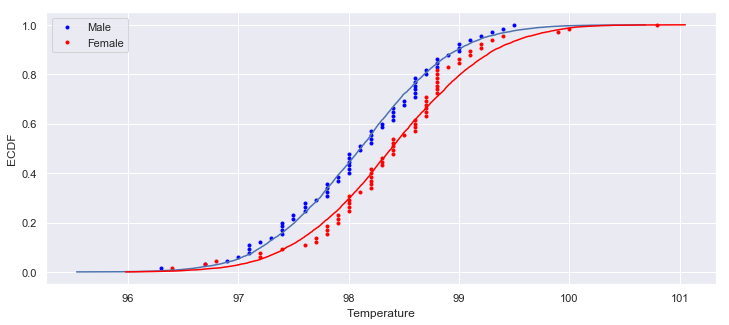

In [212]:
# Verify if both datasets are normal distributions.
plt.figure(figsize=(12,5))

m_x, m_y = ecdf(m['temperature'])
f_x, f_y = ecdf(f['temperature'])

samples = np.random.normal(m_mean, m_std, size=10000)
m_x_theor, m_y_theor = ecdf(samples)

samples = np.random.normal(f_mean, f_std, size=10000)
f_x_theor, f_y_theor = ecdf(samples)


sns.set()
_ = plt.plot(m_x, m_y, marker='.', linestyle='none', color='blue')
_ = plt.plot(f_x, f_y, marker='.', linestyle='none', color='red')
_ = plt.plot(m_x_theor, m_y_theor)
_ = plt.plot(f_x_theor, f_y_theor, color='red')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Male', 'Female'), loc=2)
plt.margins = .02
plt.show()



In [213]:
# Two-Sample t-test
two_samp = stats.ttest_ind(m['temperature'], f['temperature'])
print('The two-sample t-test had results of t-statistic = ' + str(two_samp.statistic))
print('and p-value of ' + str(two_samp.pvalue))
print('The lower the p-value, the lower the chance the results were random.')
print('Because our p-value was ' + str(two_samp.pvalue) + ', we can say that it is unlikely that the average temperatures for Males and Females is the same.')
print('Another way to put it, we reject the Null Hypothesis that stated the average temperatures between Male and Female are the same.')

The two-sample t-test had results of t-statistic = -2.2854345381656103
and p-value of 0.02393188312239561
The lower the p-value, the lower the chance the results were random.
Because our p-value was 0.02393188312239561, we can say that it is unlikely that the average temperatures for Males and Females is the same.
Another way to put it, we reject the Null Hypothesis that stated the average temperatures between Male and Female are the same.
